In [313]:
# Importing Packages

import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

# Reading the Datasets

In [314]:
# Reading the dataset
# India = pd.read_csv('Data/2nd May/Austria_Covid.csv')
Australia = pd.read_csv('Data/2nd May/Australia_Covid.csv')
Austria = pd.read_csv('Data/2nd May/Austria_Covid.csv')
China = pd.read_csv('Data/2nd May/China_Covid.csv')
Iceland = pd.read_csv('Data/2nd May/Iceland_Covid.csv')
India = pd.read_csv('Data/2nd May/India_Covid.csv')
Iran = pd.read_csv('Data/2nd May/Iran_Covid.csv')
New_Zealand = pd.read_csv('Data/2nd May/New_Zealand_Covid.csv')
S_korea = pd.read_csv('Data/2nd May/S_Korea_Covid.csv')
Switzerland = pd.read_csv('Data/2nd May/Switzerland_Covid.csv')

In [315]:
China.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
Unnamed: 0                       120 non-null int64
Date                             120 non-null object
location                         120 non-null object
new_cases                        120 non-null int64
new_deaths                       120 non-null int64
total_cases                      120 non-null int64
total_deaths                     120 non-null int64
total_tests                      120 non-null int64
Lockdown                         120 non-null float64
Public_Health                    120 non-null float64
Governance_and_socio-economic    120 non-null float64
Humanitarian_exemption           120 non-null float64
Social_distancing                120 non-null float64
Movement_restrictions            120 non-null float64
Day                              120 non-null int64
Month                            120 non-null int64
Weekday                          120 non-null int

In [430]:
def normalize_sig(df):
    df['norm_cases'] = df['new_cases']/np.std(df['new_cases'])
    df['norm_tests'] = df['total_tests']/np.std(df['total_tests'])
    df['norm_Lockdown'] = df['Lockdown']/np.std(df['Lockdown'])
    df['norm_days'] = df['days_completed']/np.std(df['days_completed'])
    df['norm_SD'] = df['Social_distancing']/np.std(df['Social_distancing'])
    df['norm_MR'] = df['Movement_restrictions']/np.std(df['Movement_restrictions'])
    #df['norm_social_distancing'] = df['Social_']
    return(df)

In [399]:
# Dataset Preprocessing before running the model
def dataset_preprocess(df):
    # Converting the datatype of dates to datetime
    dates = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    # Adding dates to the dataframe
    df['Date'] = dates
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    #Creating different columns with regressor variables
#     ds = df.index.to_series()
#     df['Day'] = ds.dt.day
#     df['Month'] = ds.dt.month
#     df['Weekday'] = ds.dt.dayofweek
#     df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
#     df = df.drop(['date'], axis = 1)
#     df = df.drop([ 'countriesAndTerritories','geoId', 'dateRep', 'countryterritoryCode', 'cases', 'deaths'], axis = 1)
    #df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [431]:
frames = [China, S_korea, Iceland, New_Zealand, Switzerland, Australia, Iran, Austria, India]
for i in frames:
    i = normalize_sig(i)
    i = dataset_preprocess(i)
    #i = adding_lagged_values(i)

# PLOT ACF and PACF Curves for the Cases Data

In [320]:
from statsmodels.tsa.stattools import acf, pacf


In [322]:
def plot_ACF(df, p):
    df = df[df['days_completed']<p]
    lag_acf = acf(df['norm_cases'], nlags=20)
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')

In [323]:
def plot_PACF(df,p):
    df = df[df['days_completed']<p]
    lag_pacf = pacf(df['norm_cases'], nlags=14, method='ols')
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()

## Austria

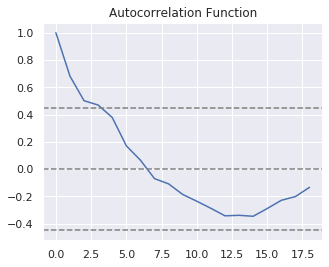

In [324]:
plot_ACF(Austria, 20)

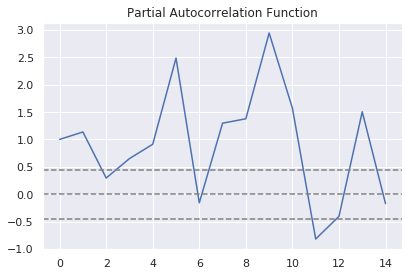

In [325]:
plot_PACF(Austria, 20)

## Australia

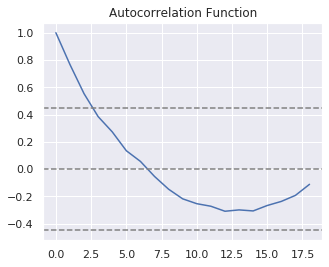

In [326]:
plot_ACF(Australia, 20)

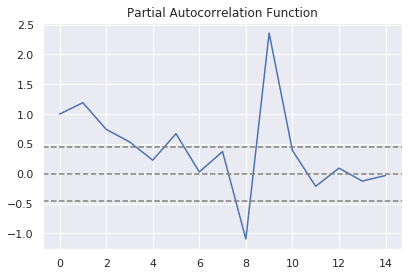

In [327]:
plot_PACF(Australia, 20)

## China

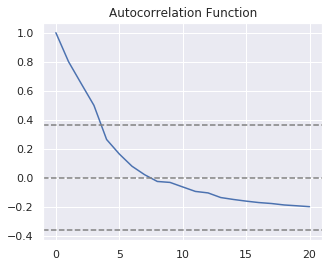

In [328]:
plot_ACF(China, 30)

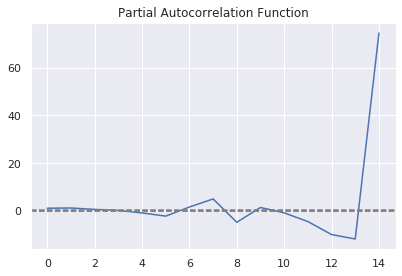

In [329]:
plot_PACF(China, 30)

## Iceland

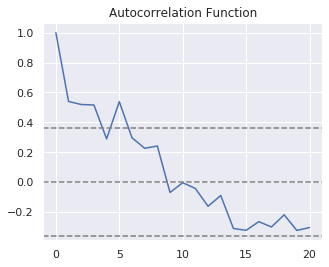

In [330]:
plot_ACF(Iceland,30)

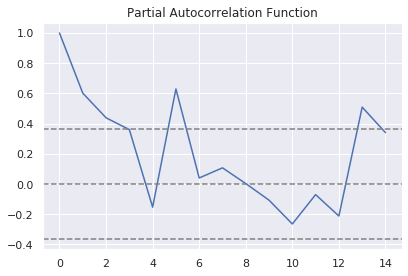

In [331]:
plot_PACF(Iceland, 30)

## India

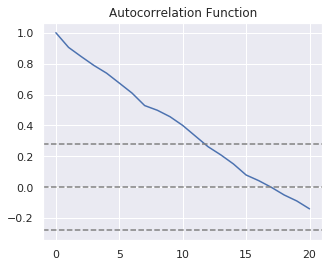

In [332]:
plot_ACF(India,50)

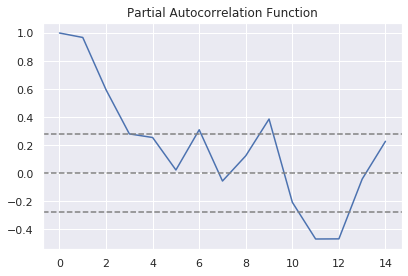

In [333]:
plot_PACF(India, 50)

## Iran

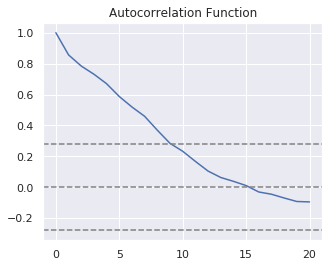

In [334]:
plot_ACF(Iran,50)

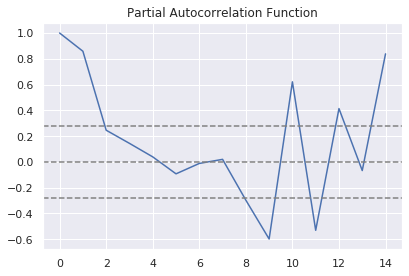

In [335]:
plot_PACF(Iran, 50)

In [433]:
def adding_lagged_values(df, lag):
    data = list(df['norm_cases'])
    lagged_data = []
    for i in range(lag):
        lagged_data.append(0)
    for i in range(lag, len(data)):
        lagged_data.append(data[i-lag])
    df['norm_lagged_cases'] = lagged_data
    df.reset_index()
    return(df)
# print(np.round(lagged_data, 2))

In [449]:
frames = [China, S_korea, Iceland, New_Zealand, Switzerland, Australia, Iran, Austria, India]
for i in frames:
    i = adding_lagged_values(i,7)

# Adding Stage Column for Countries

In [436]:
frames =   [China, S_korea, Iceland, New_Zealand, Switzerland, Australia, Iran, Austria]

data = pd.concat(frames)


In [437]:
India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 26 columns):
Unnamed: 0                       55 non-null int64
Date                             55 non-null datetime64[ns]
location                         55 non-null object
new_cases                        55 non-null int64
new_deaths                       55 non-null int64
total_cases                      55 non-null int64
total_deaths                     55 non-null int64
total_tests                      55 non-null float64
Lockdown                         55 non-null int64
Public_Health                    55 non-null int64
Governance_and_socio-economic    55 non-null int64
Humanitarian_exemption           55 non-null int64
Social_distancing                55 non-null int64
Movement_restrictions            55 non-null int64
Day                              55 non-null int64
Month                            55 non-null int64
Weekday                          55 non-null int64
Year              

In [438]:
data = data.drop('Unnamed: 0', axis = 1)

In [439]:
#data = pd.concat([data,dummy], axis = 1)

In [440]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 56
Data columns (total 25 columns):
Date                             538 non-null datetime64[ns]
location                         538 non-null object
new_cases                        538 non-null int64
new_deaths                       538 non-null int64
total_cases                      538 non-null int64
total_deaths                     538 non-null int64
total_tests                      538 non-null float64
Lockdown                         538 non-null float64
Public_Health                    538 non-null float64
Governance_and_socio-economic    538 non-null float64
Humanitarian_exemption           538 non-null float64
Social_distancing                538 non-null float64
Movement_restrictions            538 non-null float64
Day                              538 non-null int64
Month                            538 non-null int64
Weekday                          538 non-null int64
Year                             538 non

In [364]:
# Plotting the Confirmed Cases with Date
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(df, label):
    sns.set(rc = {'figure.figsize':(11,4)})
    df[label].plot(linewidth = 3, color = 'purple')

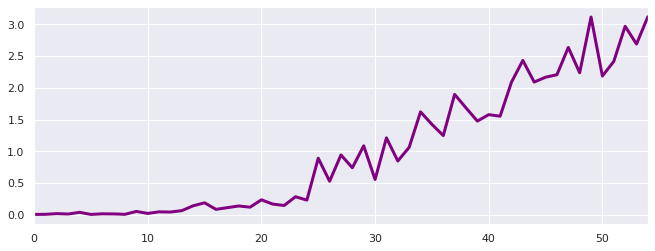

In [365]:
plot_data(India, 'norm_cases')

In [366]:
India

,Unnamed: 0,Date,location,new_cases,new_deaths,total_cases,total_deaths,total_tests,Lockdown,Public_Health,...,Movement_restrictions,Day,Month,Weekday,Year,days_completed,norm_cases,norm_tests,norm_Lockdown,norm_lagged_cases
0,0,2020-03-07,India,2,0,31,0,3.0,0,97,...,11,7,3,5,2020,1,0.003132,0.000163,0.000000,0.000000
1,1,2020-03-08,India,3,0,34,0,10.0,0,98,...,12,8,3,6,2020,2,0.004698,0.000544,0.000000,0.000000
2,2,2020-03-10,India,10,0,44,0,6.0,0,99,...,14,10,3,1,2020,3,0.015660,0.000327,0.000000,0.000000
3,3,2020-03-11,India,6,0,50,0,23.0,0,100,...,17,11,3,2,2020,4,0.009396,0.001252,0.000000,0.000000
4,4,2020-03-12,India,23,0,73,0,2.0,0,101,...,20,12,3,3,2020,5,0.036018,0.000109,0.000000,0.000000
5,5,2020-03-13,India,2,1,75,1,8.0,0,102,...,24,13,3,4,2020,6,0.003132,0.000435,0.000000,0.000000
6,6,2020-03-14,India,8,1,83,2,7.0,0,103,...,28,14,3,5,2020,7,0.012528,0.000381,0.000000,0.000000
7,7,2020-03-15,India,7,0,90,2,3.0,0,104,...,32,15,3,6,2020,8,0.010962,0.000163,0.000000,0.000000
8,8,2020-03-16,India,3,0,93,2,32.0,1,105,...,36,16,3,0,2020,9,0.004698,0.001742,0.066106,0.000000
9,9,2020-03-17,India,32,1,125,3,12.0,2,106,...,41,17,3,1,2020,10,0.050111,0.000653,0.132212,0.000000


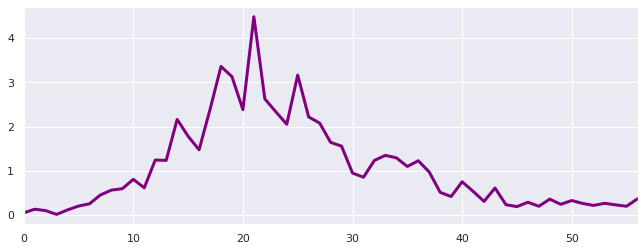

In [367]:
plot_data(Austria, 'norm_cases')

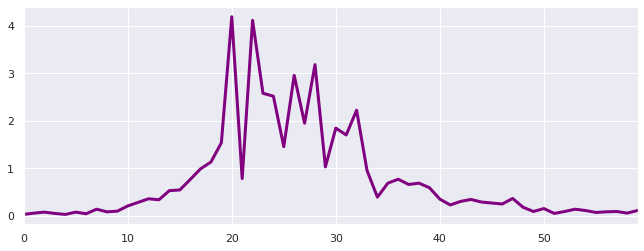

In [368]:
plot_data(Australia, 'norm_cases')

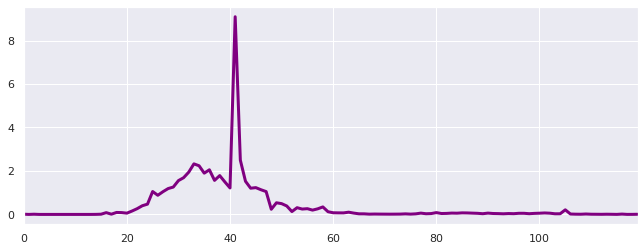

In [369]:
plot_data(China, 'norm_cases')

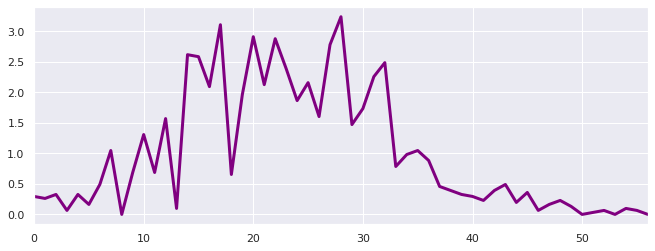

In [370]:
plot_data(Iceland, 'norm_cases')

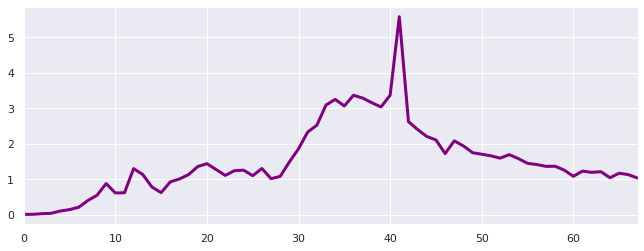

In [371]:
plot_data(Iran, 'norm_cases')

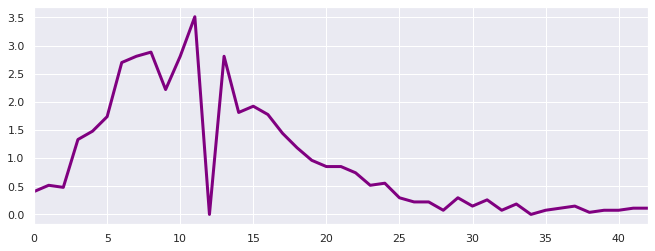

In [372]:
plot_data(New_Zealand, 'norm_cases')

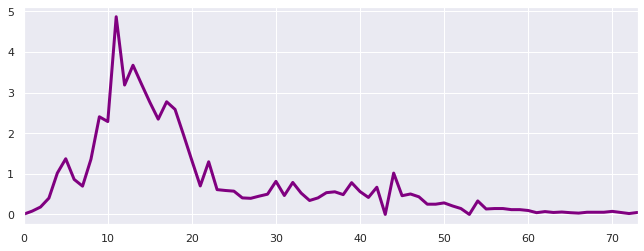

In [373]:
plot_data(S_korea, 'norm_cases')

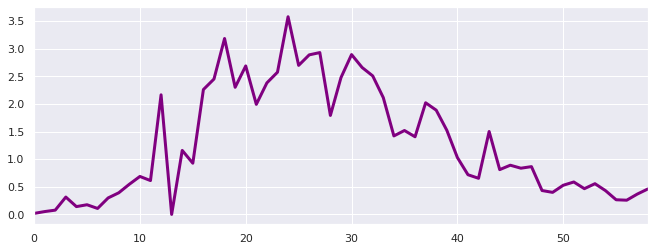

In [374]:
plot_data(Switzerland, 'norm_cases')

In [441]:
expr = """ norm_cases ~ days_completed + Weekday + norm_Lockdown + Public_Health + Movement_restrictions + Social_distancing + norm_tests"""
expr1 = """ norm_cases ~ norm_days + norm_Lockdown + norm_tests + norm_lagged_cases"""
expr2 = """ norm_cases ~ days_completed + Weekday + Lockdown + Movement_restrictions + Social_distancing + total_tests"""
expr3 = """ norm_cases ~ norm_days + norm_Lockdown + norm_MR + norm_SD + norm_tests + norm_lagged_cases"""


def train_test_split(df,ratio, expr):
    mask = np.random.rand(len(df)) < ratio
    df_train = df[mask]
    df_test = df[~mask]
    print('Training data set length='+str(len(df_train)))
    print('Testing data set length='+str(len(df_test)))
    
#     # Expression for the Model 
#     expr1 = """ cases cases ~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
#     expr2 = """cases ~ day + month + year + Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
#     expr3 = """cases ~ day + month + year + Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests + popData2018"""

    ## Matrix Formation
    y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
    return X_train, y_train, X_test, y_test

def train_model(y_train, X_train):
    model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
    print(model.summary())
    return(model)

def predict(model, X_test):
    poisson_predictions = model.get_prediction(X_test)
    #.summary_frame() returns a pandas DataFrame
    predictions_summary_frame = poisson_predictions.summary_frame()
    print(predictions_summary_frame)
    return(predictions_summary_frame)
    
    
def plot_results(predictions_summary_frame,X_test, y_test, country, label):
    predicted_counts=predictions_summary_frame['mean']
    actual_counts = y_test[label]
    fig = plt.figure()
    fig.suptitle(str('Predicted Mean of Covid 19 Cofirmed Cases Count'))
    predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
    actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
    plt.legend(handles=[predicted, actual])
    plt.show()
    return(predicted_counts, actual_counts)
    
def plot_actual_vs_output(predicted_counts, actual_counts):
    plt.clf()
    fig = plt.figure()
    fig.suptitle('Scatter plot of Actual versus Predicted counts')
    plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
    plt.xlabel('Predicted counts')
    plt.ylabel('Actual counts')
    plt.show()

# TRAINING DATA ON WORLD

## PLOTTING THE CORRELATION GRAPH

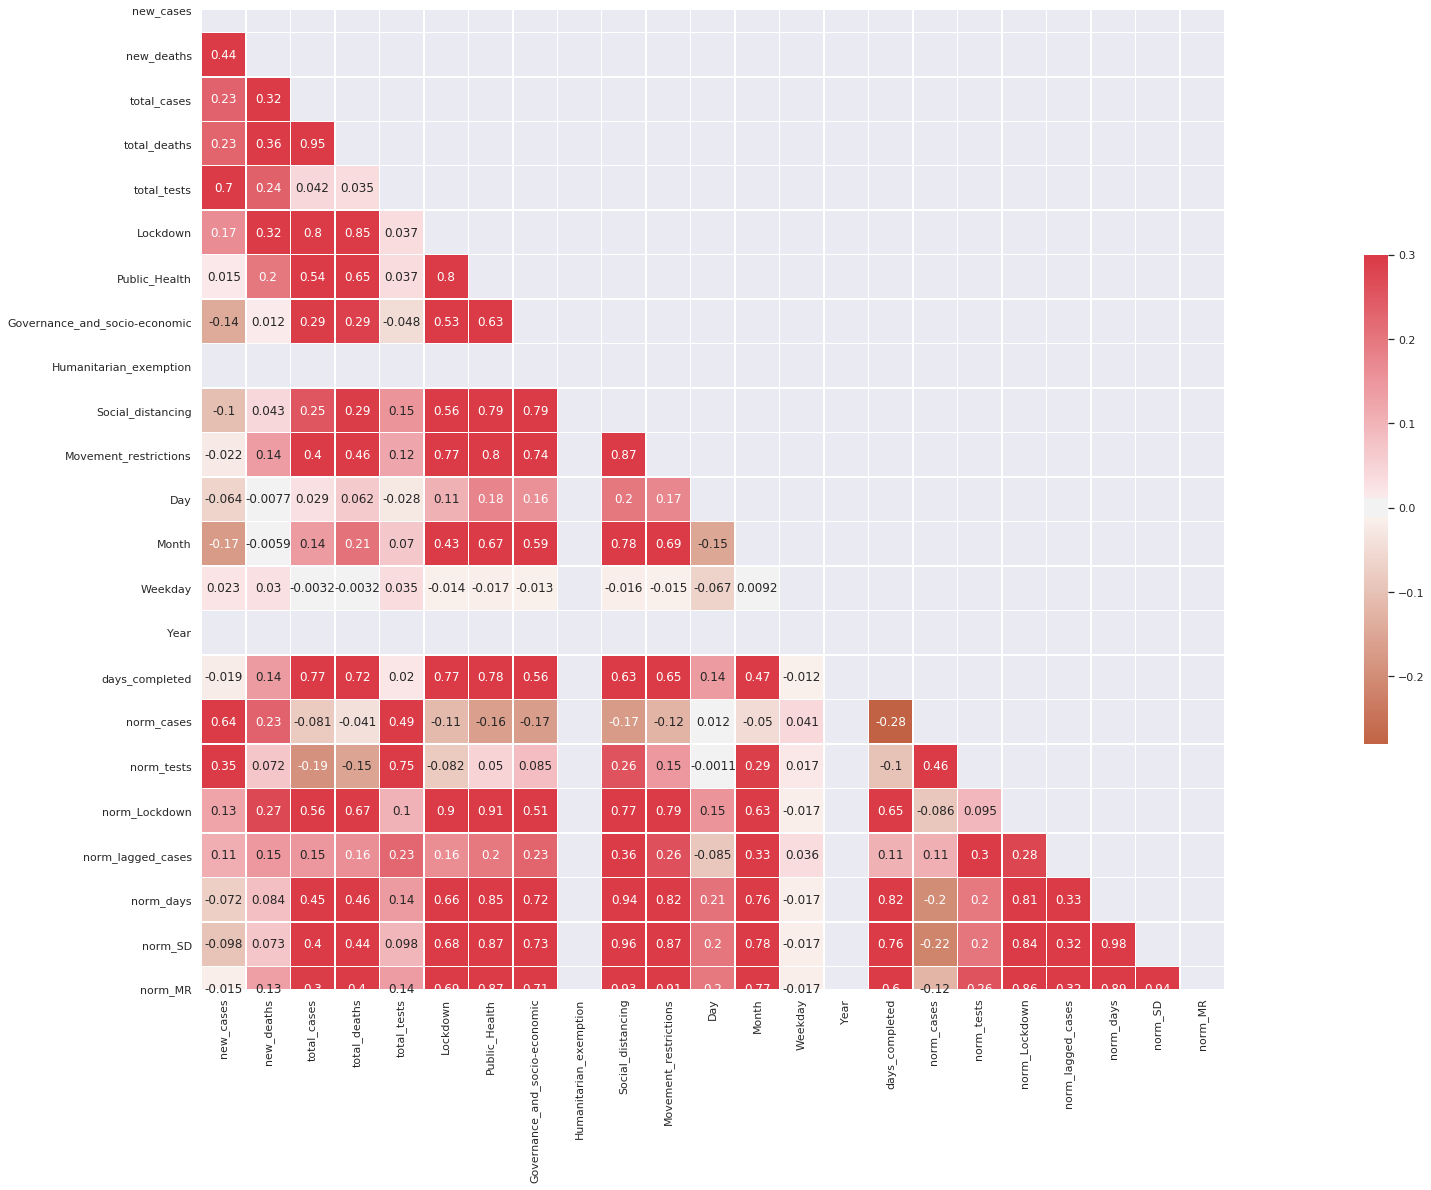

In [442]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(22, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [443]:
df_filtered = data[data['days_completed'] < 40]
df_filtered.describe()

,new_cases,new_deaths,total_cases,total_deaths,total_tests,Lockdown,Public_Health,Governance_and_socio-economic,Humanitarian_exemption,Social_distancing,...,Weekday,Year,days_completed,norm_cases,norm_tests,norm_Lockdown,norm_lagged_cases,norm_days,norm_SD,norm_MR
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.0,312.000000,...,312.000000,312.0,312.000000,312.000000,312.000000,273.000000,312.000000,312.000000,312.000000,312.000000
mean,461.679487,17.025641,5859.439103,186.403846,4356.887821,11.685897,64.291667,30.717949,0.0,29.464744,...,3.012821,2020.0,20.000000,1.213005,1.402796,0.716030,0.706716,1.113117,0.681424,0.770318
std,741.968712,34.773858,8686.987154,481.123949,4633.558610,16.379269,62.869549,31.708742,0.0,29.374487,...,1.999959,0.0,11.272708,1.067064,1.224562,0.892519,1.038057,0.702177,0.686819,0.755843
min,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,2020.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.028869,0.000000,0.000000
25%,29.750000,0.000000,357.000000,2.000000,976.750000,0.000000,10.000000,2.000000,0.0,3.000000,...,1.000000,2020.0,10.000000,0.295407,0.356280,0.000000,0.000000,0.526296,0.082796,0.077928
50%,114.500000,1.500000,1493.500000,13.000000,2969.500000,2.000000,43.500000,21.000000,0.0,19.000000,...,3.000000,2020.0,20.000000,0.956988,1.098101,0.283979,0.093349,1.033312,0.450838,0.605620
75%,594.250000,13.000000,8249.750000,103.250000,6480.000000,20.000000,106.500000,50.250000,0.0,51.000000,...,5.000000,2020.0,30.000000,1.998647,2.274212,1.304536,1.137915,1.641143,1.151436,1.276758
max,3872.000000,157.000000,47593.000000,3036.000000,36327.000000,63.000000,241.000000,127.000000,0.0,108.000000,...,6.000000,2020.0,39.000000,4.870355,7.244005,3.209735,4.870355,3.142710,2.958337,3.198569


In [444]:
India.describe()

,Unnamed: 0,new_cases,new_deaths,total_cases,total_deaths,total_tests,Lockdown,Public_Health,Governance_and_socio-economic,Humanitarian_exemption,...,Weekday,Year,days_completed,norm_cases,norm_tests,norm_Lockdown,norm_lagged_cases,norm_days,norm_SD,norm_MR
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.00000,55.000000,55.0,...,55.000000,55.0,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,27.00000,636.618182,20.854545,8313.363636,261.636364,17207.563636,20.509091,124.00000,45.836364,0.0,...,3.054545,2020.0,28.00000,0.996933,0.936517,1.355777,0.380335,1.763834,1.889822,1.667879
std,16.02082,644.462179,22.444514,10443.093779,336.952484,18543.355817,15.266609,16.02082,34.312164,0.0,...,1.994606,0.0,16.02082,1.009217,1.009217,1.009217,0.560907,1.009217,1.009217,1.009217
min,0.00000,2.000000,0.000000,31.000000,0.000000,2.000000,0.000000,97.00000,0.000000,0.0,...,0.000000,2020.0,1.00000,0.003132,0.000109,0.000000,0.000000,0.062994,0.188982,0.137832
25%,13.50000,46.500000,1.000000,275.500000,4.000000,104.000000,6.500000,110.50000,16.000000,0.0,...,1.000000,2020.0,14.50000,0.072818,0.005660,0.429690,0.001566,0.913414,1.039402,0.795665
50%,27.00000,472.000000,9.000000,2902.000000,68.000000,10705.000000,20.000000,124.00000,43.000000,0.0,...,3.000000,2020.0,28.00000,0.739144,0.582617,1.322123,0.062639,1.763834,1.889822,1.641451
75%,40.50000,1143.000000,37.000000,13882.500000,458.500000,30936.500000,33.500000,137.50000,71.500000,0.0,...,5.000000,2020.0,41.50000,1.789919,1.683710,2.214556,0.646751,2.614254,2.740242,2.487237
max,54.00000,1993.000000,73.000000,35043.000000,1147.000000,59437.000000,47.000000,151.00000,112.000000,0.0,...,6.000000,2020.0,55.00000,3.121004,3.234842,3.106989,1.896405,3.464674,3.590662,3.470855


## STEP 1: TEST-TRAIN SPLIT

In [454]:

X_train, y_train, X_test, y_test = train_test_split(df_filtered,1, expr1) 
X_India, y_India, p, q = train_test_split(India,1, expr1)
X_Switz, y_Switz,g, h = train_test_split(Switzerland, 1,expr3)
X_Austria, y_Austria,g, h = train_test_split(Austria, 1,expr3)
X_Australia, y_Australia,g, h = train_test_split(Australia, 1,expr3)
X_China, y_China,g, h = train_test_split(China, 1,expr3)
X_Sk, y_Sk, g,h = train_test_split(S_korea, 1, expr3)
X_Ice, y_Ice, g,h = train_test_split(Iceland, 1, expr3)
X_Iran, y_Iran, g,h = train_test_split(Iran, 1, expr3)
X_Nz, y_Nz, g,h = train_test_split(New_Zealand, 1, expr3)


Training data set length=312
Testing data set length=0
Training data set length=55
Testing data set length=0
Training data set length=59
Testing data set length=0
Training data set length=57
Testing data set length=0
Training data set length=60
Testing data set length=0
Training data set length=120
Testing data set length=0
Training data set length=74
Testing data set length=0
Training data set length=57
Testing data set length=0
Training data set length=68
Testing data set length=0
Training data set length=43
Testing data set length=0


## STEP 2: MODEL TRAINING AND SUMMARY

In [455]:
model = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             norm_cases   No. Observations:                  273
Model:                            GLM   Df Residuals:                      268
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -353.49
Date:                Wed, 06 May 2020   Deviance:                       228.01
Time:                        10:56:19   Pearson chi2:                     205.
No. Iterations:                     5   Covariance Type:             nonrobust
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4120      0.118     -3.485      0.000      -0.644      -0.180
norm_days             0.2710   

## STEP 3: PREDICTIONS

In [456]:
predictions_frame = predict(model, X_India)

        mean   mean_se  mean_ci_lower  mean_ci_upper
0   0.673729  0.076842       0.538768       0.842499
1   0.685389  0.075625       0.552099       0.850858
2   0.697152  0.074691       0.565109       0.860048
3   0.709307  0.074100       0.577977       0.870478
4   0.721325  0.073888       0.590119       0.881704
5   0.733799  0.074116       0.602010       0.894440
6   0.746422  0.074821       0.613283       0.908465
7   0.758788  0.075973       0.623584       0.923307
8   0.773431  0.076532       0.637080       0.938964
9   0.786480  0.077149       0.648918       0.953204
10  0.802701  0.078520       0.662658       0.972339
11  0.814041  0.079268       0.672605       0.985218
12  0.834960  0.082216       0.688415       1.012700
13  0.850042  0.084179       0.700078       1.032129
14  0.866965  0.086922       0.712296       1.055219
15  0.885475  0.090260       0.725120       1.081291
16  0.904791  0.091423       0.742232       1.102952
17  0.930735  0.096632       0.759366       1.

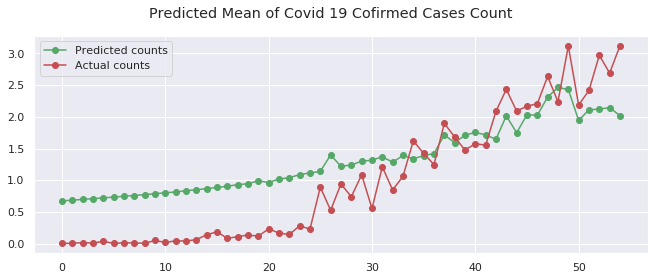

0.6737293924397588 0.003131965903322207
0.6853887160376028 0.00469794885498331
0.6971523415417248 0.015659829516611035
0.7093071566273011 0.00939589770996662
0.7213254398345629 0.03601760788820538
0.7337991177411964 0.003131965903322207
0.7464220910299256 0.012527863613288828
0.7587881715504353 0.010961880661627725
0.7734307981455956 0.00469794885498331
0.7864803840862011 0.05011145445315531
0.8027008651180846 0.01879179541993324
0.8140407677823572 0.0438475226465109
0.8349599926283466 0.04071555674318869
0.850041809020505 0.06263931806644414
0.866964647153028 0.13937248269783822
0.8854750331605977 0.1863519712476713
0.9047909755687302 0.08299709643803849
0.930734577891854 0.10961880661627724
0.9438600832483642 0.13624051679451601
0.9925048674281016 0.11744872137458276
0.9629818618341544 0.23333145979750441
1.019539415177883 0.16599419287607697
1.0389955887143496 0.1440704315528215
1.0890495962159754 0.2818769312989986
1.1140705959201713 0.2286335109425211
1.139666455050763 0.889478316

In [457]:
predicted_counts, actual_counts = plot_results(predictions_frame,X_India, y_India, India, 'norm_cases')
for i in range(len(predicted_counts.index)): 
    print(predicted_counts[i], actual_counts[i])